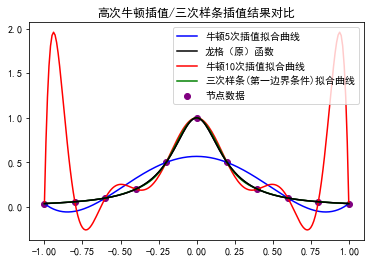

In [11]:
# 第三方库matplotlib的应用

import matplotlib.pyplot as plt
from pylab import mpl
import numpy as np

# 利用matplotlib画出数学函数值计算中不同方法的区别
''''''
def newton_dd(x: list, f: list, n: int):  # 此处 n表示多项式阶数，为节点数-1
    dd = [0 for _ in range(n)]  # divided difference

    for i in range(n):
        for j in range(n-1, i-1, -1):  # n-1,n-2,...,i 必须从后往前
            if i == 0:
                dd[j] = (f[j+1] - f[j]) / (x[j+1] - x[j])
            else:
                dd[j] = (dd[j] - dd[j-1]) / (x[j+1] - x[j-i])
    return dd

def get_function(data: np.ndarray, x: list, f: list, n: int):
    parm = newton_dd(x, f, n)
    #print(parm)
    res = f[0]
    w = 1
    for i in range(n):
        w *= data - x[i]
        res += parm[i] * w

    return res


'''三次样条插值法'''
def SI_dd(x: list, f: list, n: int):  # n-节点数   只要二阶均差
    dd = [0 for _ in range(0, n - 1)]  # divided difference

    for i in range(0, 2):
        for j in range(0, n - 1 - i):  # 0, 1, 2, 3
            if i == 0:
                dd[j] = (f[j + 1] - f[j]) / (x[j + 1] - x[j])
            else:
                dd[j] = (dd[j + 1] - dd[j]) / (x[j + 2] - x[j])
    # print(dd)
    return dd

def solve_m(x: list, f: list, n: int, f_: list):
    h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
    hh = [(f[_ + 1] - f[_]) / h[_] for _ in range(0, n - 1)]
    # print(hh)
    p = np.array(np.eye(n, n)) * 2
    d = np.array(SI_dd(x, f, n)[0: -1])
    d_0 = (hh[0] - f_[0]) / h[0]
    d_n = (f_[1] - hh[n - 2]) / h[n - 2]
    d = np.insert(d, 0, d_0)
    d = np.append(d, d_n)
    # print(d_0, d_n)

    lmd = [h[_ + 1] / (h[_] + h[_ + 1]) for _ in range(0, n - 2)]
    lmd.insert(0, 1)

    miu = [h[_] / (h[_] + h[_ + 1]) for _ in range(0, n - 2)]
    miu.append(1)
    for i in range(0, n - 1):
        p[i][i + 1] = lmd[i]
    for j in range(1, n):
        p[j][j - 1] = miu[j - 1]
    m = np.dot(np.linalg.inv(p), 6 * d)

    return m

def get__function(data: np.ndarray, start: float, end: float, i: int, x: list, f: list, n: int, f_: list):
    h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
    m = solve_m(x, f, n, f_)

    res_ = m[i] / (6 * h[i]) * pow(end - data, 3) + m[i + 1] / (6 * h[i]) * pow(data - start, 3) + \
          (f[i + 1] - m[i + 1] / 6 * pow(h[i], 2)) * (data - start) / h[i] + \
          (f[i] - m[i] / 6 * pow(h[i], 2)) * (end - data) / h[i]

    return res_

'''牛顿插值拟合曲线'''
def draw(data: np.ndarray, x: list, f: list, n: int):
    if n == 6:
        plt.plot(data, get_function(data, x, f, n-1), label="牛顿5次插值拟合曲线", color="blue")
        mpl.rcParams['font.sans-serif'] = ['SimHei']
        mpl.rcParams['axes.unicode_minus'] = False
        plt.legend(loc="upper right")
    else:
        plt.plot(data, get_function(data, x, f, n - 1), label="牛顿10次插值拟合曲线", color="red")
        mpl.rcParams['font.sans-serif'] = ['SimHei']
        mpl.rcParams['axes.unicode_minus'] = False
        plt.legend(loc="upper right")

'''三次样条插值拟合曲线'''
def draw_(x: list, f: list, n: int, f_: list):
    if n == 6:
        pass
    else:
        h = [x[_ + 1] - x[_] for _ in range(0, n - 1)]
        plt.scatter(x, f, label="节点数据", color="purple")
        plt.title("高次牛顿插值/三次样条插值结果对比")

        for i in range(0, n - 1):
            if i != n - 2:
                plt.plot(np.arange(x[i], x[i + 1] + 0.001, 0.001),
                    get__function(np.arange(x[i], x[i + 1] + 0.001, 0.001), x[i], x[i] + h[i], i, x, f, n, f_),
                         color="green")
                mpl.rcParams['font.sans-serif'] = ['SimHei']
                mpl.rcParams['axes.unicode_minus'] = False
                plt.legend(loc="upper right")
            else:
                plt.plot(np.arange(x[i], x[i + 1] + 0.001, 0.001),
                    get__function(np.arange(x[i], x[i + 1] + 0.001, 0.001), x[i], x[i] + h[i], i, x, f, n, f_),
                    label="三次样条(第一边界条件)拟合曲线",color="green")
                mpl.rcParams['font.sans-serif'] = ['SimHei']
                mpl.rcParams['axes.unicode_minus'] = False
                plt.legend(loc="upper right")
    '''龙格函数(原函数)曲线'''
    x_= list(np.arange(-1, 1.01, 0.01))
    f_= [1 / (1 + 25*pow(num, 2)) for num in x_]
    plt.plot(x_, f_, label="龙格（原）函数", color="black")

for n in (6,11):
    x = list(np.arange(-1, 1 + 2 / (n - 1), 2 / (n - 1)))
    f = [1 / (1 + 25*pow(num, 2)) for num in x]
    f_ = [50 / pow(1 + 25, 2), -50 / pow(1 + 25, 2)]
    draw(np.arange(-1, 1.01, 0.01), x, f, n)
    draw_(x, f, n, f_)

if __name__ == "__main__":
    plt.savefig("1.png")
    plt.show()

In [13]:
# pandas库的应用
import pandas as pd
import numpy as np

def adder(ele1,ele2):
   return ele1+ele2

df = pd.DataFrame(np.random.randn(5,3),columns=['col1','col2','col3'])
df.pipe(adder,2)
print (df.apply(np.mean))

col1   -0.445874
col2    0.559370
col3   -0.283163
dtype: float64


In [21]:
import pandas as pd 
import numpy as np 
from scipy import stats # scipy是开源数值计算，科学与工程应用的开源库 (scipy.stats)主要用于统计

x=[53, 61, 49, 66, 78, 47] # 列表[1,6]
n = len(x) # n为x中数据个数

# 使用pandas计算偏度与峰度
s=pd.Series(x)#将列表x转换为pandas中的Series，其实就相当于一维的矩阵
print('----------------使用pandas计算的偏度与峰度(无偏)----------------')
print('偏度  = ',s.skew(),'峰度:',s.kurt()) # 计算偏度和峰度

# 使用stats计算偏度与峰度
print('----------------使用stats计算的偏度与峰度(有偏)----------------')
skew=stats.skew(x)#使用stats计算偏度
kurtosis = stats.kurtosis(x)#使用stats计算峰度
print('偏度 =',skew,'峰度 =',kurtosis)

# 使用文本中公式计算的偏度与峰度
print('----------------使用文本中公式计算的偏度与峰度----------------')
R_mean = np.mean(x) # 均值 
R_var = np.var(x,ddof = 1)  # 方差(除以n-1)
R_var1 = np.var(x) # 方差(除以n)
R_sc = np.mean((x - R_mean)** 3)/(R_var**3)**.5 #偏度使用除以n-1的方差
R_ku = np.mean((x - R_mean)**4)/R_var1**2-3 #峰度使用除以n的方差
print('偏度 =',R_sc,'峰度 =',R_ku)

# 此部分可用于验证pandas的计算结果 ###### 
# R_sc = 30**0.5*np.mean((x - R_mean)**3)/(R_var1**3)**.5 /4# 偏度
# R_ku = (n+1)*n/(n-1)/(n-2)/(n-3)*sum((x - R_mean)**4)/(R_var**2)-3*(n-1)*(n-1)/(n-2)/(n-3) # 峰度
# print([R_sc, R_ku])#输出偏度、峰度



# 设置参数计算有偏和无偏 

print('----------------设置参数计算有偏和无偏----------------')
def skewAndkurt(x,parm):
    '''
    parm = 2: 使用文本中公式计算的偏度与峰度(有偏)
    parm = 1: 使用pandas计算的偏度与峰度(无偏)
    parm = 0: 使用stats计算的偏度与峰度(有偏)
    '''
    if parm == 2:
        print('parm = 2 , 使用文本中公式计算的偏度与峰度(有偏):')
        R_mean = np.mean(x) # 均值 
        R_var = np.var(x,ddof = 1)  # 方差(除以n-1)
        R_var1 = np.var(x) # 方差(除以n)
        R_sc = np.mean((x - R_mean)** 3)/(R_var**3)**.5 #偏度使用除以n-1的方差
        R_ku = np.mean((x - R_mean)**4)/R_var1**2-3 #峰度使用除以n的方差
        print('偏度 =',R_sc,'峰度 =',R_ku)
    if parm == 1:
        print('parm = 1 , 使用pandas计算的偏度与峰度(无偏):')
        s=pd.Series(x) # 使用pandas计算的偏度与峰度(无偏)
        print('偏度  = ',s.skew(),'峰度:',s.kurt()) # 计算偏度和峰度
    elif parm == 0: # 使用stats计算的偏度与峰度(有偏)
        print('parm = 0 , 使用stats计算的偏度与峰度(有偏):')
        skew=stats.skew(x) # 使用stats计算偏度
        kurtosis = stats.kurtosis(x)#使用stats计算峰度
        print('偏度 =',skew,'峰度 =',kurtosis)

parm = 0
skewAndkurt(x,0) 
parm = 1
skewAndkurt(x,1)  
parm = 2
skewAndkurt(x,2)  

----------------使用pandas计算的偏度与峰度(无偏)----------------
偏度  =  0.7826325504212567 峰度: -0.2631655441038463
----------------使用stats计算的偏度与峰度(有偏)----------------
偏度 = 0.5715540028046954 峰度 = -0.9473710436927472
----------------使用文本中公式计算的偏度与峰度----------------
偏度 = 0.4347958613451424 峰度 = -0.9473710436927472
----------------设置参数计算有偏和无偏----------------
parm = 0 , 使用stats计算的偏度与峰度(有偏):
偏度 = 0.5715540028046954 峰度 = -0.9473710436927472
parm = 1 , 使用pandas计算的偏度与峰度(无偏):
偏度  =  0.7826325504212567 峰度: -0.2631655441038463
parm = 2 , 使用文本中公式计算的偏度与峰度(有偏):
偏度 = 0.4347958613451424 峰度 = -0.9473710436927472


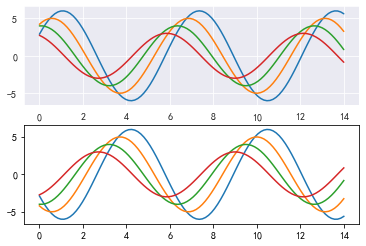

In [25]:
# seaborn 库的应用
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def sinplot(flip=1): #自定义一个函数
    x = np.linspace(0,14,100) #0-14取100个点

    for i in range(1,5):
        plt.plot(x,np.sin(x + i *0.5) * (7 - i) * flip)
    #plt.show()

#sinplot()


with sns.axes_style("darkgrid"): #with里面的用一种背景风格
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)
plt.show()

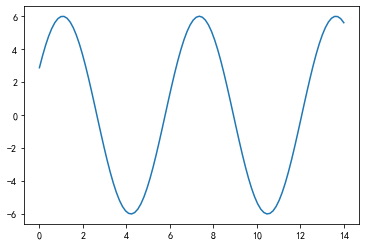

In [31]:
import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

np.random.seed(sum(map(ord, "aesthetics")))


def sinplot(flip=1):

    x= np.linspace(0, 14, 100)

    for i in range(1, 2):
        
        plt.plot(x,np.sin(x + i * .5) * (7 - i) * flip)
        plt.show()
  
sinplot(flip=1)